In [1]:
import pystan
import os
import pandas as pd
import pickle
import arviz as az 
pd.options.mode.chained_assignment = None
import math
from scipy.stats import norm
import xarray
import matplotlib.pyplot as plt

In [2]:
#load in models 

#change directory to where the pickled stan files are located
os.chdir('../phd_data/rGT_models')

basic = pickle.load(open('basic.pkl', 'rb'))
basic2 = pickle.load(open('basic2.pkl', 'rb'))
pscale = pickle.load(open('pscale.pkl', 'rb'))
pscale2 = pickle.load(open('pscale2.pkl', 'rb'))
pindep = pickle.load(open('pindep.pkl', 'rb'))
pindep2 = pickle.load(open('pindep2.pkl', 'rb'))

In [3]:
def load_fit(file_name):
    #load fit:
    with open(file_name, 'rb') as f:
        fit_dict = pickle.load(f)
    
#extract model fit from loaded dictionary
    return fit_dict['fit']

def transform(dataset):
    dataset = dataset.to_array()
    dataset.values = norm.pdf(dataset)
    return dataset

def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [4]:
#load in basic fits for all four groups

basic_su = load_fit('basic_su_dict.pkl')
basic_sc = load_fit('basic_sc_dict.pkl')
basic_rc = load_fit('basic_rc_dict.pkl')
basic_ru = load_fit('basic_ru_dict.pkl')

In [5]:
pscale_su = load_fit('pscale_su_dict.pkl')
pscale_sc = load_fit('pscale_sc_dict.pkl')
pscale_rc = load_fit('pscale_rc_dict.pkl')
pscale_ru = load_fit('pscale_ru_dict.pkl')

In [6]:
pindep_sc = load_fit('pindep_sc_dict.pkl')
pindep_su = load_fit('pindep_su_dict.pkl')
pindep_rc = load_fit('pindep_rc_dict.pkl')
pindep_ru = load_fit('pindep_ru_dict.pkl')

In [9]:
basic_su_az = az.convert_to_inference_data(basic_su)
basic_sc_a

basic_su_az

Inference data with groups:
	> posterior
	> sample_stats

In [87]:
basic_su_az.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 800, mu_pr_dim_0: 4)>
array([[[-1.69919293, -2.18502495, -1.72382353,  0.01495035],
        [-1.7124233 , -2.23008583, -1.65911302,  0.0142691 ],
        [-1.67018934, -2.24223221, -1.7428693 ,  0.01704926],
        ...,
        [-1.61945762, -2.14362681, -1.42517821,  0.01065628],
        [-1.68732246, -2.20830512, -1.34377147,  0.01073199],
        [-1.73793372, -2.09732265, -1.46779753,  0.00518084]],

       [[-1.70872075, -2.12926092, -1.53444839,  0.00642964],
        [-1.72753534, -2.07991007, -1.52440774,  0.00657606],
        [-1.61460462, -2.15857175, -1.56935449,  0.00571023],
        ...,
        [-1.75858697, -2.14919409, -1.31944789,  0.00964504],
        [-1.71967826, -2.14790964, -1.35747201,  0.00827674],
        [-1.70512722, -2.21275859, -1.53047264,  0.00805709]],

       [[-1.70041179, -2.09221159, -1.50978312,  0.00893514],
        [-1.65902532, -2.18238486, -1.41626095,  0.00476264],
        [-1.69415428, -2.13281001, -1.46131941,  0.00911415],
        ...,
        [-1.78258636, -2.10556856, -1.63254572,  0.01415369],
        [-1.67957723, -2.24267809, -1.50573193,  0.01474848],
        [-1.71611666, -2.17479023, -1.54070182,  0.00824244]],

       [[-1.61532499, -2.22595109, -1.43222669,  0.00880634],
        [-1.71730994, -2.16568438, -1.30475554,  0.00839141],
        [-1.61729505, -2.23803867, -1.5149906 ,  0.01231567],
        ...,
        [-1.77631196, -2.19841805, -1.55134897,  0.00857382],
        [-1.74960284, -2.12769866, -1.54409945,  0.00839442],
        [-1.59863953, -2.2339849 , -1.50776794,  0.01425414]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 793 794 795 796 797 798 799
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

array([[<AxesSubplot:title={'center':'mu_pr\n0'}>,
        <AxesSubplot:title={'center':'mu_pr\n0'}>],
       [<AxesSubplot:title={'center':'mu_pr\n1'}>,
        <AxesSubplot:title={'center':'mu_pr\n1'}>],
       [<AxesSubplot:title={'center':'mu_pr\n2'}>,
        <AxesSubplot:title={'center':'mu_pr\n2'}>]], dtype=object)

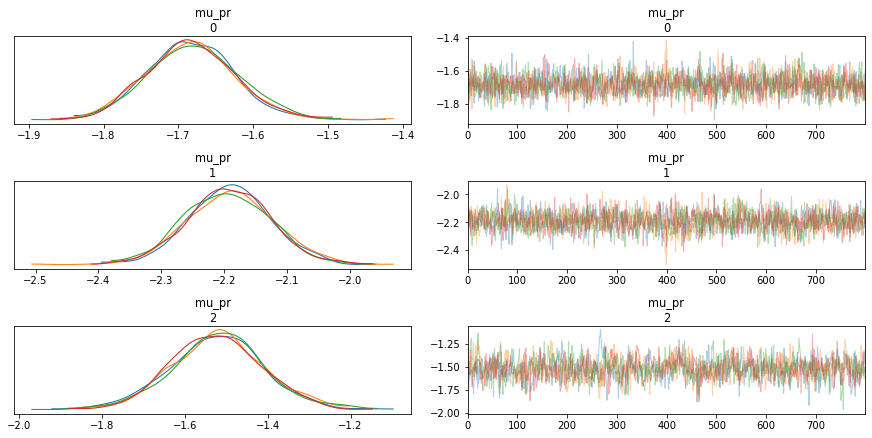

In [11]:
#extract posterior distribution
#transform = norm.cdf
#transform = transform, combined = True

az.plot_trace(basic_su_az.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2]}, )

In [19]:
az.summary(az.convert_to_inference_data(pscale_rc))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-1.833,0.079,-1.978,-1.683,0.002,0.002,1242.0,1242.0,1271.0,1559.0,1.0
mu_pr[1],-2.168,0.082,-2.321,-2.014,0.002,0.002,1439.0,1439.0,1442.0,2029.0,1.0
mu_pr[2],-1.748,0.163,-2.052,-1.429,0.004,0.003,1619.0,1619.0,1616.0,2252.0,1.0
mu_pr[3],0.006,0.003,0.001,0.013,0.000,0.000,2001.0,1897.0,2092.0,2417.0,1.0
sigma[0],0.311,0.058,0.213,0.426,0.001,0.001,1754.0,1754.0,1712.0,2741.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
m[27],0.009,0.007,-0.001,0.021,0.000,0.000,3136.0,2231.0,4355.0,2742.0,1.0
m[28],0.014,0.008,0.004,0.028,0.000,0.000,2163.0,2105.0,2413.0,2834.0,1.0
m[29],0.007,0.007,-0.002,0.021,0.000,0.000,3534.0,3148.0,4093.0,3289.0,1.0
m[30],0.008,0.006,-0.000,0.019,0.000,0.000,2998.0,2481.0,3632.0,2702.0,1.0


/home/brett/anaconda3/envs/stan_env/lib/python3.8/site-packages/arviz/plots/traceplot.py:250: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (350), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu_pr\n0'}>,
        <AxesSubplot:title={'center':'mu_pr\n0'}>],
       [<AxesSubplot:title={'center':'mu_pr\n1'}>,
        <AxesSubplot:title={'center':'mu_pr\n1'}>],
       [<AxesSubplot:title={'center':'mu_pr\n2'}>,
        <AxesSubplot:title={'center':'mu_pr\n2'}>],
       [<AxesSubplot:title={'center':'mu_pr\n3'}>,
        <AxesSubplot:title={'center':'mu_pr\n3'}>],
       [<AxesSubplot:title={'center':'mu_pr\n4'}>,
        <AxesSubplot:title={'center':'mu_pr\n4'}>],
       [<AxesSubplot:title={'center':'mu_pr\n5'}>,
        <AxesSubplot:title={'center':'mu_pr\n5'}>],
       [<AxesSubplot:title={'center':'mu_pr\n6'}>,
        <AxesSubplot:title={'center':'mu_pr\n6'}>],
       [<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n0'}>],
       [<AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>],
       [<AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:t

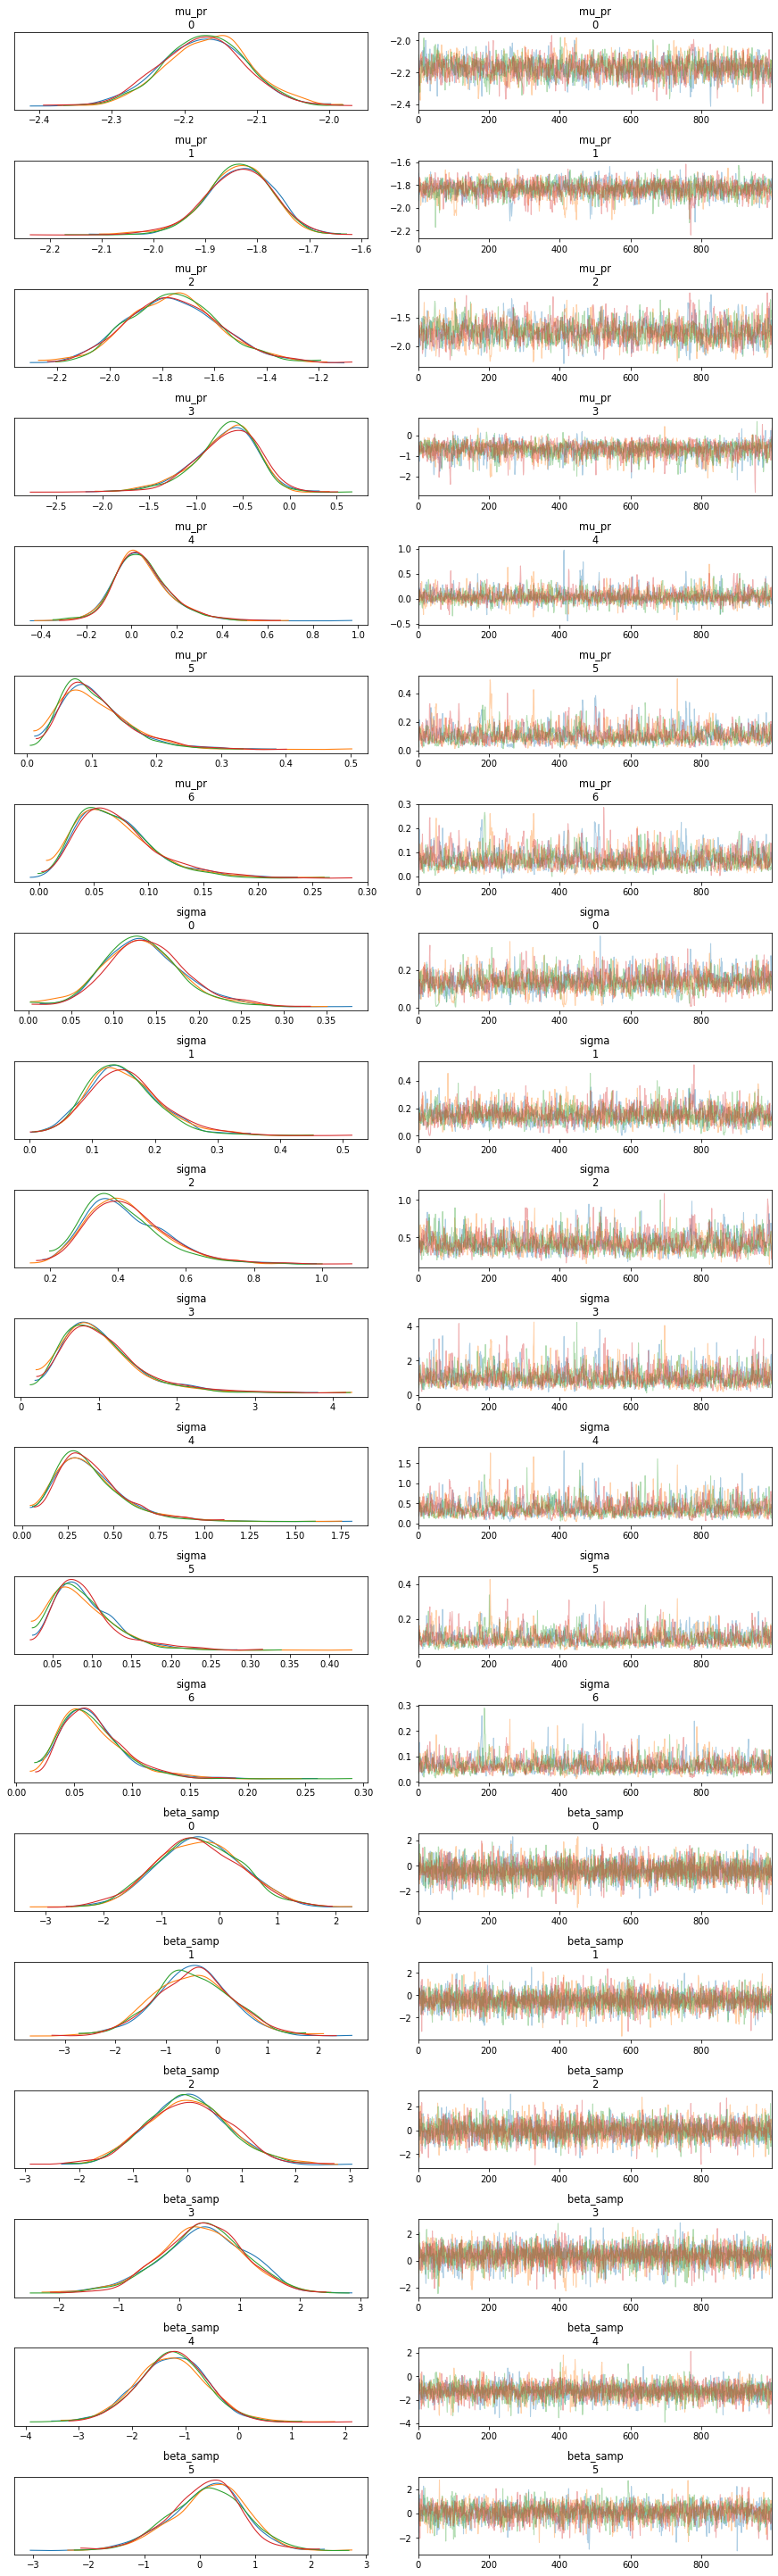

In [14]:
az.plot_trace(pindep_sc)

In [21]:
basic_su_df = basic_su.to_dataframe()

In [26]:
basic_su_df.keys()

Index(['chain', 'draw', 'warmup', 'mu_pr[1]', 'mu_pr[2]', 'mu_pr[3]',
       'mu_pr[4]', 'sigma[1]', 'sigma[2]', 'sigma[3]',
       ...
       'm[22]', 'm[23]', 'm[24]', 'lp__', 'accept_stat__', 'stepsize__',
       'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=210)

In [106]:
basic_su.extract(pars = 'mu_pr')

OrderedDict([('mu_pr',
              array([[-1.74275047, -2.20412253, -1.4713333 ,  0.00752074],
                     [-1.61593992, -2.26344836, -1.50671702,  0.00825315],
                     [-1.7805595 , -2.18638378, -1.5154113 ,  0.0112071 ],
                     ...,
                     [-1.66711162, -2.13465965, -1.54419317,  0.01141638],
                     [-1.69701819, -2.13364091, -1.45468716,  0.00909386],
                     [-1.66442169, -2.17586247, -1.48467219,  0.00842297]]))])

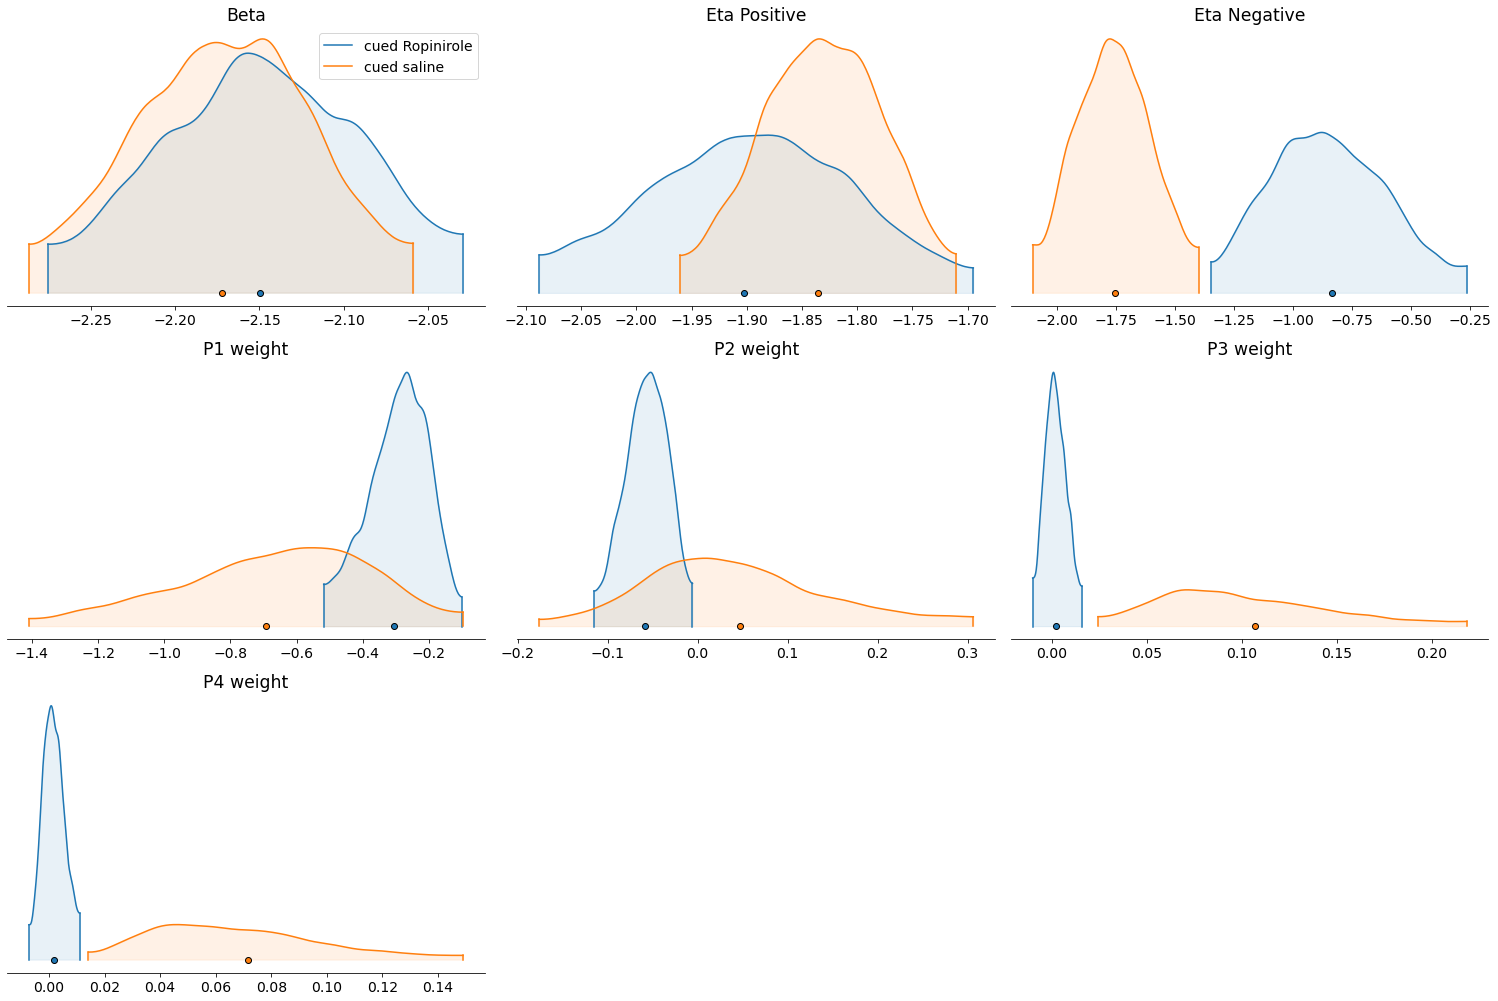

In [18]:
ax = az.plot_density([pindep_rc,pindep_sc], var_names = 'mu_pr', 
                data_labels = ['cued Ropinirole', 'cued saline'],
                shade = 0.1, 
               hdi_prob = 0.95)
#transform = transform1
params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')


<AxesSubplot:title={'center':'Eta Positive'}>

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

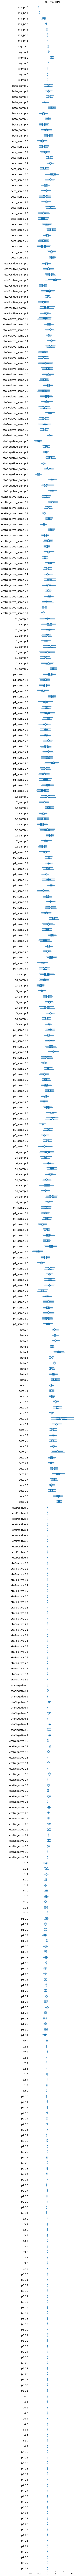

In [29]:
az.plot_forest(pindep_rc)

/home/brett/anaconda3/envs/stan_env/lib/python3.8/site-packages/arviz/plots/plot_utils.py:557: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (264) in plot_violin, generating only 40 plots
  warnings.warn(


array([<AxesSubplot:xlabel='mu_pr\n0'>, <AxesSubplot:xlabel='mu_pr\n1'>,
       <AxesSubplot:xlabel='mu_pr\n2'>, <AxesSubplot:xlabel='mu_pr\n3'>,
       <AxesSubplot:xlabel='sigma\n0'>, <AxesSubplot:xlabel='sigma\n1'>,
       <AxesSubplot:xlabel='sigma\n2'>, <AxesSubplot:xlabel='sigma\n3'>,
       <AxesSubplot:xlabel='beta_samp\n0'>,
       <AxesSubplot:xlabel='beta_samp\n1'>,
       <AxesSubplot:xlabel='beta_samp\n2'>,
       <AxesSubplot:xlabel='beta_samp\n3'>,
       <AxesSubplot:xlabel='beta_samp\n4'>,
       <AxesSubplot:xlabel='beta_samp\n5'>,
       <AxesSubplot:xlabel='beta_samp\n6'>,
       <AxesSubplot:xlabel='beta_samp\n7'>,
       <AxesSubplot:xlabel='beta_samp\n8'>,
       <AxesSubplot:xlabel='beta_samp\n9'>,
       <AxesSubplot:xlabel='beta_samp\n10'>,
       <AxesSubplot:xlabel='beta_samp\n11'>,
       <AxesSubplot:xlabel='beta_samp\n12'>,
       <AxesSubplot:xlabel='beta_samp\n13'>,
       <AxesSubplot:xlabel='beta_samp\n14'>,
       <AxesSubplot:xlabel='beta_samp\n15'>

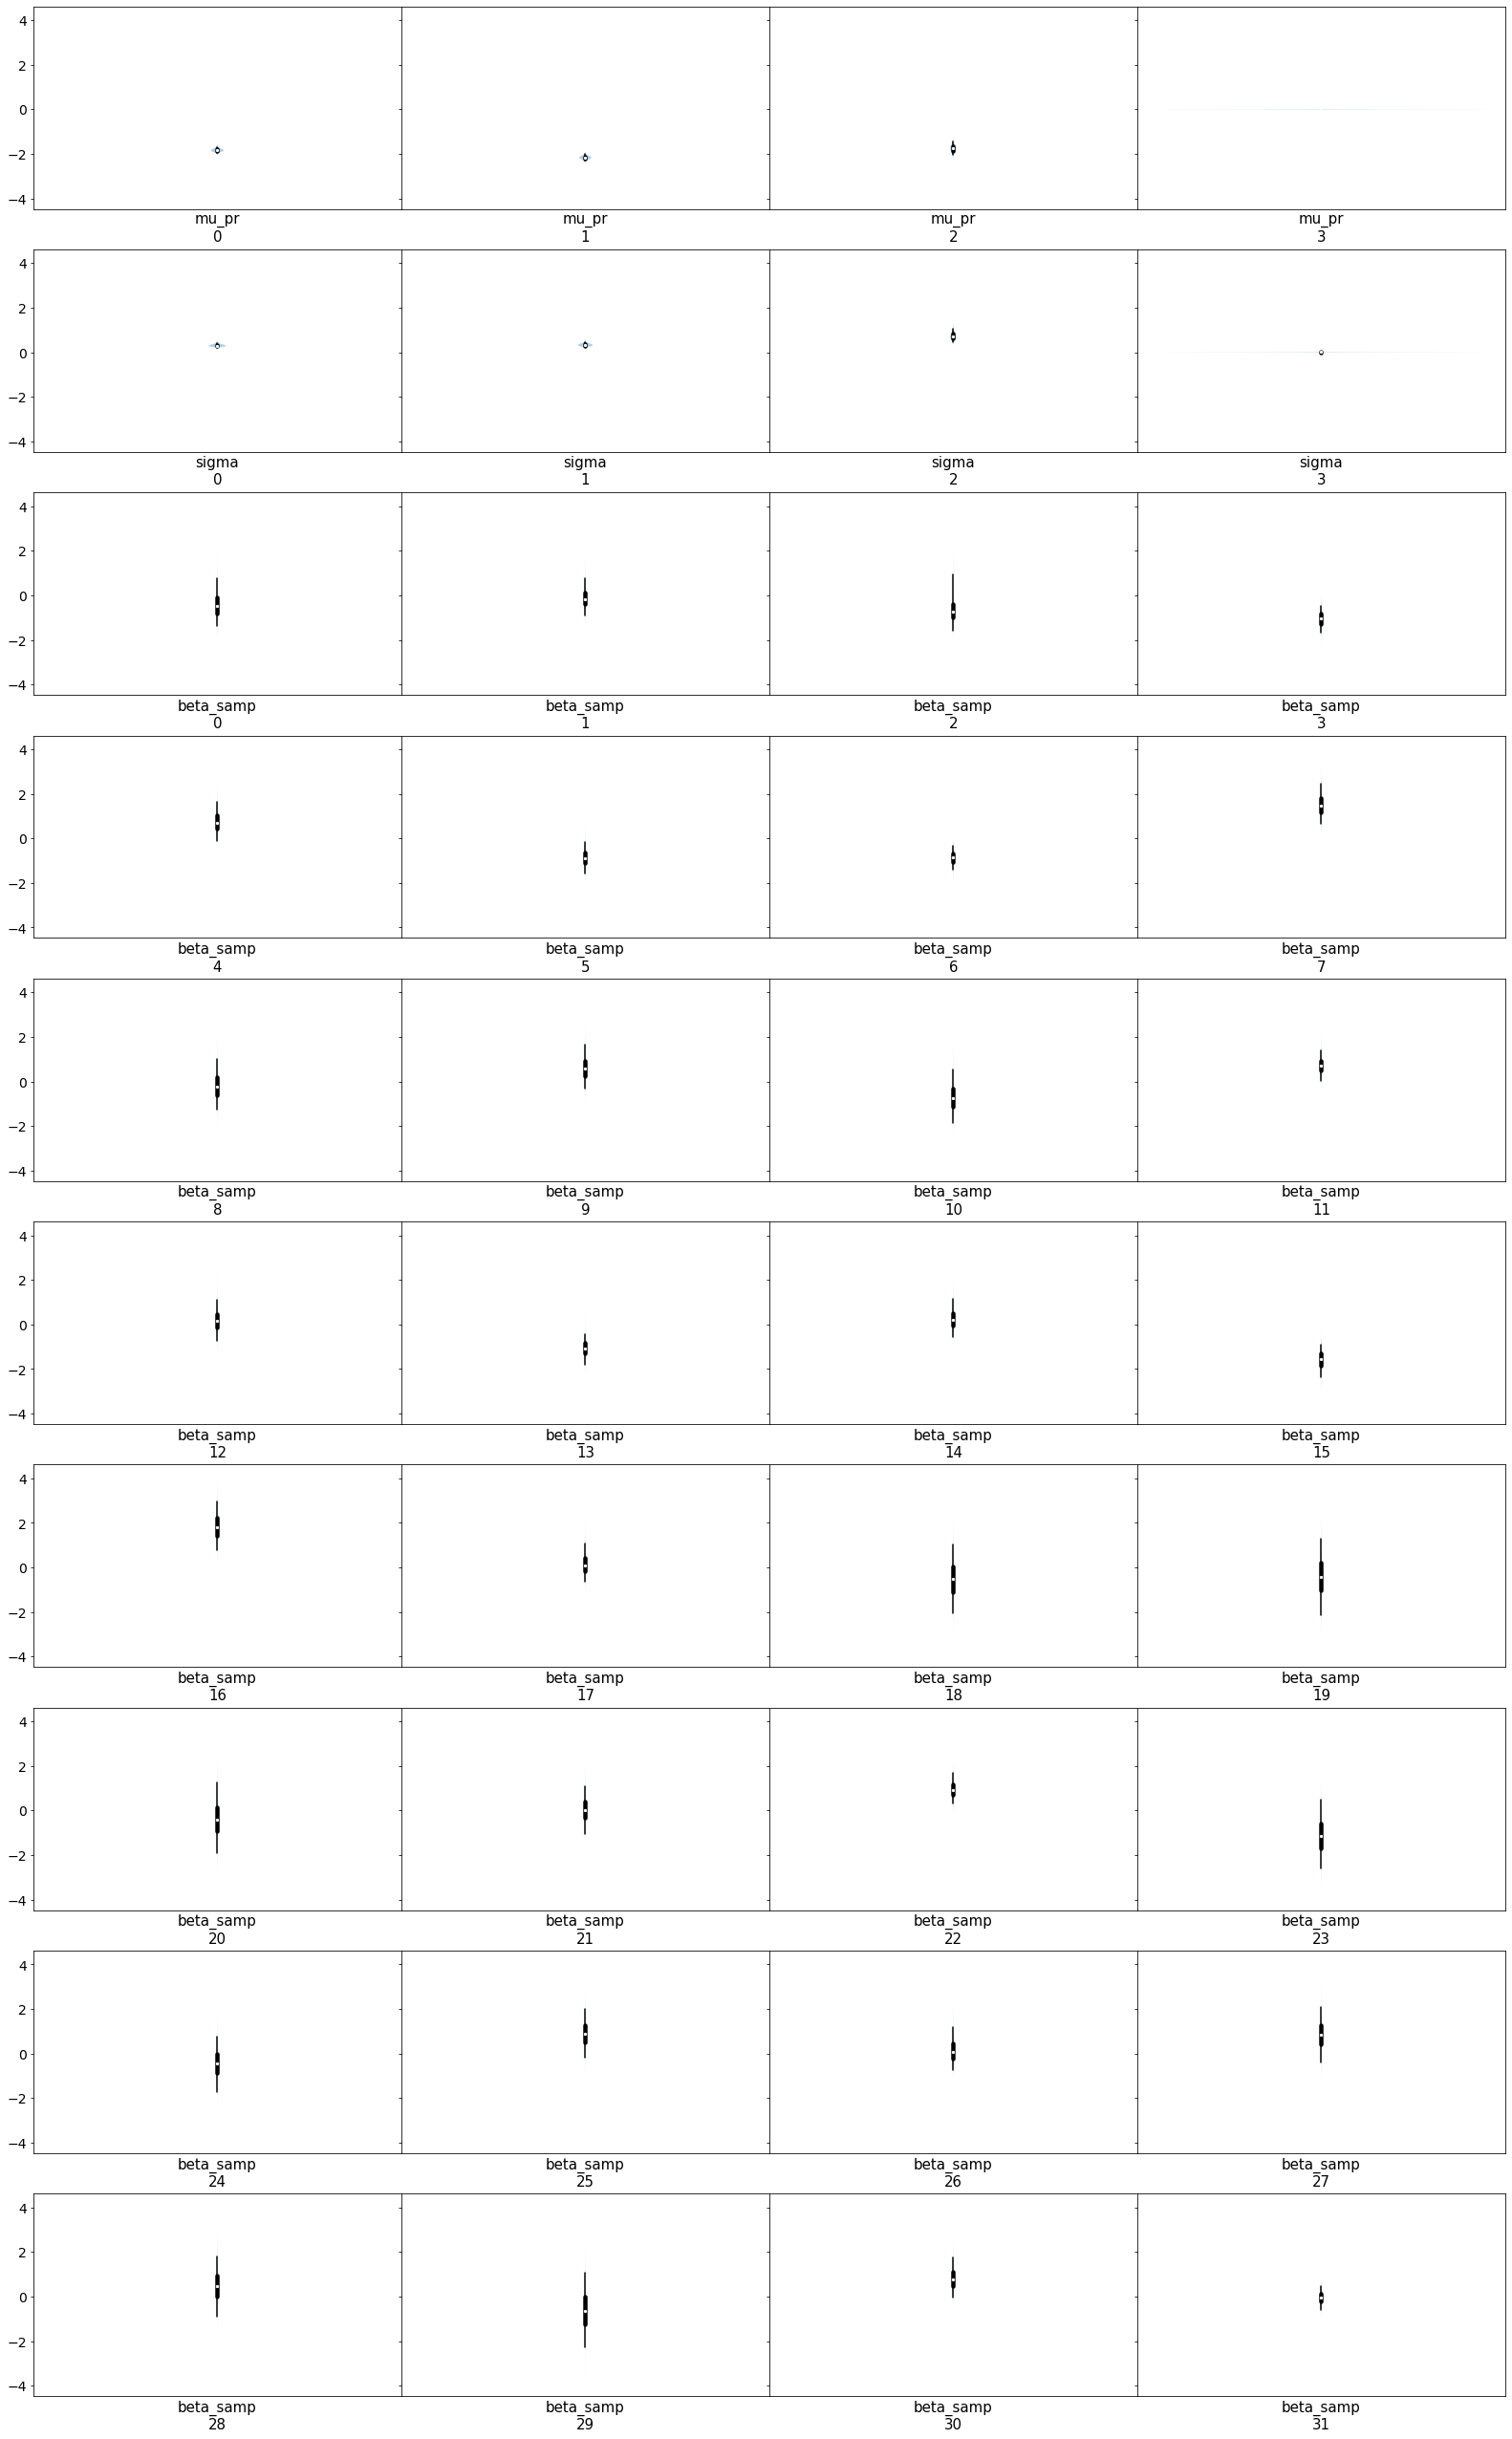

In [51]:
az.plot_violin(basic_rc)

In [111]:
basic_su_az.posterior.mu_pr.values

array([[[-1.69919293, -2.18502495, -1.72382353,  0.01495035],
        [-1.7124233 , -2.23008583, -1.65911302,  0.0142691 ],
        [-1.67018934, -2.24223221, -1.7428693 ,  0.01704926],
        ...,
        [-1.61945762, -2.14362681, -1.42517821,  0.01065628],
        [-1.68732246, -2.20830512, -1.34377147,  0.01073199],
        [-1.73793372, -2.09732265, -1.46779753,  0.00518084]],

       [[-1.70872075, -2.12926092, -1.53444839,  0.00642964],
        [-1.72753534, -2.07991007, -1.52440774,  0.00657606],
        [-1.61460462, -2.15857175, -1.56935449,  0.00571023],
        ...,
        [-1.75858697, -2.14919409, -1.31944789,  0.00964504],
        [-1.71967826, -2.14790964, -1.35747201,  0.00827674],
        [-1.70512722, -2.21275859, -1.53047264,  0.00805709]],

       [[-1.70041179, -2.09221159, -1.50978312,  0.00893514],
        [-1.65902532, -2.18238486, -1.41626095,  0.00476264],
        [-1.69415428, -2.13281001, -1.46131941,  0.00911415],
        ...,
        [-1.78258636, -2.10

In [7]:
##WAIC

def softmax(x,beta):
    
    return np.exp(beta*x)/np.sum(np.exp(beta*x))

# calculate pointwise log-likelihood (ie for each datapoint)


#run chosen option through softmax equation, beta*V? with categorical logit PDF? not sure if I then take the maximum of this??

#then need to actually calculate WAIC

#point estimates and standard errors of the expected log pointwise predictive density 

#multiplied by -2
